In [19]:
from selenium.webdriver.common.by import By
from selenium import webdriver as wd
from bs4 import BeautifulSoup as bs
from selenium.common.exceptions import ElementNotInteractableException
import time
import re


# 데이터 베이스
DataBase = []

# pin 데이터 변환 딕셔너리
pinReplacer = {
    "pin_general"    : "G",
    "pin_reserve"    : "R",
    "pin_generalDT"  : "DT",
    "pin_generalWT"  : "WT"
}

def parser(sido:str)->None:
    """
    Description
    -----------
    페이지의 html로부터 데이터를 dict 형태로 저장하고 DataBase list에 이를 적재함

    Parameters
    ----------
        - sido(str) : 시도 이름

    Returns --> None
    """
    try:
        htmlraw = driver.page_source
        soup = bs(htmlraw, "html5lib")
        lis = soup.select(".quickSearchResultBoxSidoGugun > li")
        for li in lis:
            tmp = {}
            location = li.select_one("p").text[:-9]
            tmp["지점면"] = li.select_one("strong").text.strip()
            tmp["주소"] = location
            tmp["시군구"] = loactionFilter(location)[0]
            tmp["시도"] = loactionFilter(location)[1]
            tmp["타입"] = pinReplacer[li.select_one("i").get_attribute_list("class")[0]]
            DataBase.append(tmp)
    except Exception as e:
        print(e)
        print("    ---> ",sido, "에러 발생")

def get_sidos():
    """
    Description
    -----------
    시도 이름 리스트 반환 함수

    Parameters : None

    Returns
    -------
    sidos(list) : 시도 리스트
    """
    htmlraw = driver.page_source
    soup = bs(htmlraw, "html5lib")
    sidos = list(map(lambda web : web.text ,soup.select(".sido_arae_box > li")))
    return sidos

def loactionFilter(location:str)->tuple:
    """
    Description
    -----------
    정규식을 이용하여 주소 데이터로부터 "도/시/군/구"를 추출하는 함수

    Parameters
    ----------
    location(str) : 주소 데이터

    Returns
    -------
    - sido, gugun (tuple)
        - 추출 된 주소 데이터가 [도, 시, 구, 군]일 때,
        - 리스트에서 첫번째 인자 --> sido
        - " ".join(나머지 인자들) --> gugun
    """
    pattern = re.compile(r"\s?([가-힣]+[도|시|구|군])\b")
    filtered = pattern.findall(location)
    if len(filtered) > 4:
        data = filtered[:3]
    else:
        data = filtered
    try: 
        sido = data[0]
        gugun = " ".join(data[1:])
    except IndexError:
        sido = "대구광역시" # 사이트 내부 주소누락 에러 처리
        gugun = '북구'
    return sido, gugun

def crawler()->None:
    """
    Description
    -----------
    시도 -> 전체 옵션을 반복적으로 크롤링하는 함수

    Parameters, Returns --> None
    """
    for i, sido in enumerate(get_sidos()):
        clickLocalSearch()
        time.sleep(1)
        sidoWebEle()[i].click()
        time.sleep(1)
        try:
            clickTotalOption()    
            time.sleep(8)
            parser(sido)
        except ElementNotInteractableException:
            parser(sido)
        except Exception as e:
            print(e)
            print(sido)

# 지역검색 옵션 클릭함수
clickLocalSearch = lambda : driver.find_element(By.CSS_SELECTOR, ".loca_search").click()

# 시도 내에 전체 클릭함수
clickTotalOption = lambda : driver.find_element(By.CSS_SELECTOR,".set_gugun_cd_btn").click()

# sido webelement list 반환함수
sidoWebEle = lambda : driver.find_elements(By.CSS_SELECTOR,".set_sido_cd_btn")



In [15]:
# 드라이버 열기
driver = wd.Chrome()
time.sleep(5)

# target url로 이동
targetUrl = "https://www.starbucks.co.kr/store/store_map.do"
driver.get(targetUrl)
time.sleep(5)

crawler()

driver.close()

In [16]:
print("전체 데이터 수 : ", len(DataBase))
DataBase[]

전체 데이터 수 :  1904


[{'지점면': '창원상남로  ',
  '주소': '경상남도 창원시 성산구 상남로 88 (상남동)',
  '시군구': '경상남도',
  '시도': '창원시 성산구',
  '타입': 'G'},
 {'지점면': '마산역DT  ',
  '주소': '경상남도 창원시 마산회원구 3·15대로 715 (석전동)',
  '시군구': '경상남도',
  '시도': '창원시 마산회원구',
  '타입': 'DT'},
 {'지점면': '마산해안대로DT  ',
  '주소': '경상남도 창원시 마산합포구 해안대로 383 (오동동)',
  '시군구': '경상남도',
  '시도': '창원시 마산합포구',
  '타입': 'DT'},
 {'지점면': '진해자은DT  ',
  '주소': '경상남도 창원시 진해구 진해대로 962 (자은동)',
  '시군구': '경상남도',
  '시도': '창원시 진해구',
  '타입': 'DT'},
 {'지점면': '창원역DT  ',
  '주소': '경상남도 창원시 의창구 의창대로 68 (팔용동)',
  '시군구': '경상남도',
  '시도': '창원시 의창구',
  '타입': 'DT'},
 {'지점면': '창원호계DT  ',
  '주소': '경상남도 창원시 마산회원구 내서읍 호원로 315 ',
  '시군구': '경상남도',
  '시도': '창원시 마산회원구',
  '타입': 'DT'},
 {'지점면': '창원마창대교  ',
  '주소': '경상남도 창원시 성산구 삼귀로 159 (귀곡동)',
  '시군구': '경상남도',
  '시도': '창원시 성산구',
  '타입': 'G'},
 {'지점면': '삼성창원병원  ',
  '주소': '경상남도 창원시 마산회원구 팔용로 158 (합성동)',
  '시군구': '경상남도',
  '시도': '창원시 마산회원구',
  '타입': 'G'},
 {'지점면': '마산터미널  ',
  '주소': '경상남도 창원시 마산회원구 합성남로 6-1 (합성동)',
  '시군구': '경상남도',
  '시도': '창원시 마산회원구',
  '타입'

In [17]:
# 적재된 데이터 json 형태로 저장
from datetime import datetime
import json

print(f"전체 데이터 수 : {len(DataBase)}")

with open("crawling_data_v2.json", "w") as file:
    json.dump({    "date": str(datetime.now()),
                    "description": "전국 스타벅스 매장의 데이터를 '지점명, 주소, 시군구, 시도, 타입'를 키로 갖는 데이터로 저장함",
                    "data length" : len(DataBase),
                    "data" : DataBase
                    }, file, indent=4, ensure_ascii = False)

전체 데이터 수 : 1904


In [18]:
# pandas 데이터 프레임을 로드
import pandas as pd
columns = DataBase[0].keys()

df = pd.DataFrame(DataBase, columns = columns)
print(display(df))
print(df.info())

,지점면,주소,시군구,시도,타입
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),서울특별시,강남구,G
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),서울특별시,강남구,G
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),서울특별시,강남구,G
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),서울특별시,강남구,G
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),서울특별시,강남구,G
...,...,...,...,...,...
1899,세종반곡,세종특별자치시 한누리대로 1844 (반곡동),세종특별자치시,,G
1900,세종한솔,세종특별자치시 노을3로 101 (한솔동),세종특별자치시,,G
1901,세종소담,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",세종특별자치시,,G
1902,세종금강DT,세종특별자치시 시청대로 45 (대평동),세종특별자치시,,DT


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지점면     1904 non-null   object
 1   주소      1904 non-null   object
 2   시군구     1904 non-null   object
 3   시도      1904 non-null   object
 4   타입      1904 non-null   object
dtypes: object(5)
memory usage: 74.5+ KB
None


사이트 내부 에러


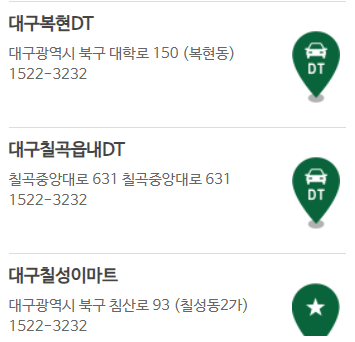


```code
---------------------------------------------------------
대구칠곡읍내DT
칠곡중앙대로 631 칠곡중앙대로 631  <--- '대구광역시 북구' 주소 누락됨
1522-3232
---------------------------------------------------------
```